In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('DataScience_salaries_2024.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [8]:
mask=data['remote_ratio']==50
hu=data[mask]
hu.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S


In [9]:
hu.shape

(248, 11)

In [17]:
pt=hu.pivot_table(index='work_year',columns='job_title',values='salary',aggfunc='count')

In [18]:
pt

job_title,AI Developer,AI Engineer,AI Product Manager,AI Research Scientist,AI Scientist,Analytics Engineer,Analytics Engineering Manager,Applied Data Scientist,Applied Machine Learning Scientist,Applied Scientist,...,Marketing Data Engineer,Marketing Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist,Staff Machine Learning Engineer
work_year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1.0
2022,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
2023,3.0,1.0,1.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN
2024,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import seaborn as sns

<Axes: xlabel='job_title', ylabel='work_year'>

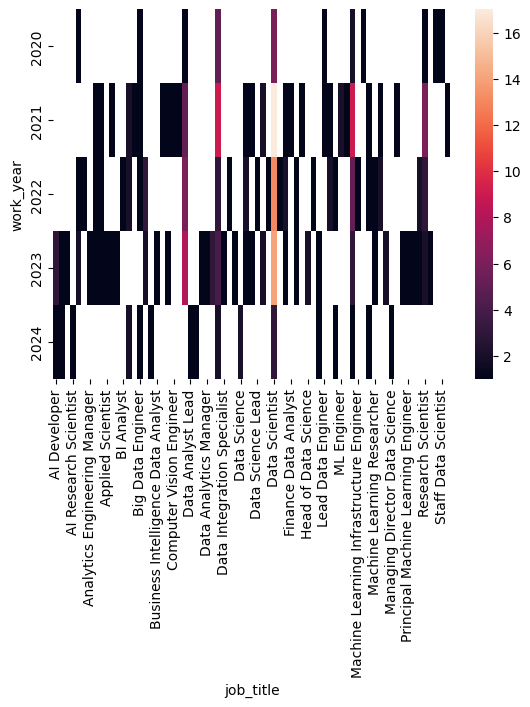

In [19]:
sns.heatmap(pt)

In [21]:
#correlation 
data.corr(numeric_only=True)

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.074329,0.090873,-0.204954
salary,-0.074329,1.000000,0.128313,0.019249
salary_in_usd,0.090873,0.128313,1.000000,-0.064829
remote_ratio,-0.204954,0.019249,-0.064829,1.000000


<Axes: >

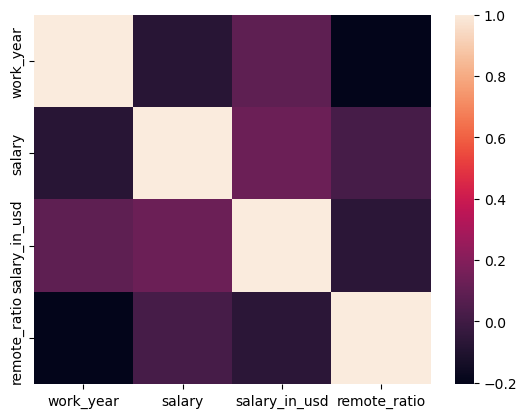

In [23]:
sns.heatmap(data.corr(numeric_only=True))

In [25]:
#remote cois(renaming cols names )

In [28]:
data.rename(columns={'company_location':'company_loc','employee_residence':'emp_residence'},inplace=True) 

In [36]:
# set and reset index
data.set_index('job_title')

,experience_level,employment_type,salary,salary_currency,salary_in_usd,emp_residence,remote_ratio,company_loc,company_size
job_title,,,,,,,,,
Data Scientist,MI,FT,30400000,CLP,40038,CL,100,CL,L
BI Data Analyst,MI,FT,11000000,HUF,36259,HU,50,US,L
Data Scientist,MI,FT,11000000,HUF,35735,HU,50,HU,L
ML Engineer,MI,FT,8500000,JPY,77364,JP,50,JP,S
Lead Machine Learning Engineer,SE,FT,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...
Business Intelligence Developer,MI,FT,15000,USD,15000,GH,100,GH,M
Staff Data Analyst,EX,FT,15000,USD,15000,NG,0,CA,M
Machine Learning Developer,EN,FT,15000,USD,15000,TH,100,TH,L


In [38]:
data.reset_index()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,emp_residence,remote_ratio,company_loc,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [40]:
data['job_title'].value_counts().reset_index()

,job_title,count
0,Data Engineer,3162
1,Data Scientist,3015
2,Data Analyst,2189
3,Machine Learning Engineer,1542
4,Research Scientist,475
...,...,...
148,Deep Learning Researcher,1
149,Big Data Developer,1
150,AWS Data Architect,1
151,Staff Machine Learning Engineer,1
